In [5]:
from sklearn.datasets import load_files
import os
import re

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.datasets import fetch_20newsgroups, load_files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, log_loss, roc_auc_score,
                             roc_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [14]:


train_reviews = load_files(
    os.path.join("/Users/aleksashka/Desktop/Projects/ML/_static/data/aclImdb", "train"), categories=["pos", "neg"]
)

train_text, train_y = train_reviews.data, train_reviews.target


test_reviews = load_files(
    os.path.join("/Users/aleksashka/Desktop/Projects/ML/_static/data/aclImdb", "train"), categories=["pos", "neg"]
)

test_text, test_y = test_reviews.data, test_reviews.target


In [12]:
!du -hs /Users/aleksashka/Desktop/Projects/ML/_static/data/aclImdb/train
!du -hs /Users/aleksashka/Desktop/Projects/ML/_static/data/aclImdb/test

365M	/Users/aleksashka/Desktop/Projects/ML/_static/data/aclImdb/train
121M	/Users/aleksashka/Desktop/Projects/ML/_static/data/aclImdb/test


In [17]:
type(train_reviews), len(train_reviews.data)

(sklearn.utils._bunch.Bunch, 25000)

In [18]:
train_reviews.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [20]:
train_reviews.target[0]   #good

1

In [21]:
train_reviews.data[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [22]:
train_reviews.target[1]   #bad

0

BOW - Bag-of-words

In [23]:
import numpy as np
from scipy.sparse import csr_matrix

In [30]:
a = np.zeros([5, 5])
a[2,3] = 5
a[4,2] = 9 
a[2,4] = 4
a[1,1] = 3
a[3,4] = 2
a[0,0] = 1

In [31]:
a

array([[1., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 0., 5., 4.],
       [0., 0., 0., 0., 2.],
       [0., 0., 9., 0., 0.]])

In [32]:
b = csr_matrix(a)

In [33]:
b

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [35]:
b.todense()

matrix([[1., 0., 0., 0., 0.],
        [0., 3., 0., 0., 0.],
        [0., 0., 0., 5., 4.],
        [0., 0., 0., 0., 2.],
        [0., 0., 9., 0., 0.]])

In [36]:
b.nonzero()

(array([0, 1, 2, 2, 3, 4], dtype=int32),
 array([0, 1, 3, 4, 4, 2], dtype=int32))

In [37]:
b.data

array([1., 3., 5., 4., 2., 9.])

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv = CountVectorizer()
X_train_sparse = cv.fit_transform(train_reviews.data)

In [45]:
len(cv.vocabulary_), cv.vocabulary_

(74849,
 {'zero': 74609,
  'day': 16697,
  'leads': 38088,
  'you': 74324,
  'to': 67125,
  'think': 66526,
  'even': 22718,
  're': 53749,
  'why': 72965,
  'two': 68769,
  'boys': 8714,
  'young': 74334,
  'men': 42153,
  'would': 73714,
  'do': 19326,
  'what': 72703,
  'they': 66474,
  'did': 18292,
  'commit': 13616,
  'mutual': 44618,
  'suicide': 64223,
  'via': 71205,
  'slaughtering': 60766,
  'their': 66367,
  'classmates': 12694,
  'it': 34683,
  'captures': 10582,
  'must': 44560,
  'be': 6334,
  'beyond': 7145,
  'bizarre': 7518,
  'mode': 43375,
  'of': 46680,
  'being': 6663,
  'for': 25450,
  'humans': 32047,
  'who': 72904,
  'have': 30118,
  'decided': 16929,
  'withdraw': 73343,
  'from': 26180,
  'common': 13635,
  'civility': 12582,
  'in': 33004,
  'order': 47196,
  'define': 17169,
  'own': 47889,
  'world': 73651,
  'coupled': 15137,
  'destruction': 17920,
  'br': 8724,
  'is': 34585,
  'not': 46050,
  'perfect': 49221,
  'movie': 44147,
  'but': 9881,
  'given

In [46]:
X_test_sparse = cv.transform(test_reviews.data)

In [47]:
X_train_sparse.shape, X_test_sparse.shape

((25000, 74849), (25000, 74849))

In [48]:
X_train_sparse

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [74]:
3445861/(25000*74849)

0.0018415000868415075

In [53]:
from sklearn.linear_model import SGDClassifier, LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
y_train, y_test = train_reviews.target, test_reviews.target

In [55]:
np.bincount(y_train), np.bincount(y_test)

(array([12500, 12500]), array([12500, 12500]))

In [59]:
logit = LogisticRegression(random_state=17, n_jobs=-1, solver="lbfgs")
sgd_logit = SGDClassifier(max_iter=40,random_state=17, n_jobs=-1)

In [60]:
%%time
logit.fit(X_train_sparse, y_train)

CPU times: user 23.4 ms, sys: 41 ms, total: 64.5 ms
Wall time: 1.73 s


/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [61]:
%%time
sgd_logit.fit(X_train_sparse, y_train)

CPU times: user 1.15 s, sys: 363 ms, total: 1.51 s
Wall time: 362 ms


/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=40, n_jobs=-1, random_state=17)

In [62]:
accuracy_score(y_test,logit.predict(X_test_sparse))

0.98116

In [64]:
accuracy_score(y_test, sgd_logit.predict(X_test_sparse))

0.95196

In [65]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


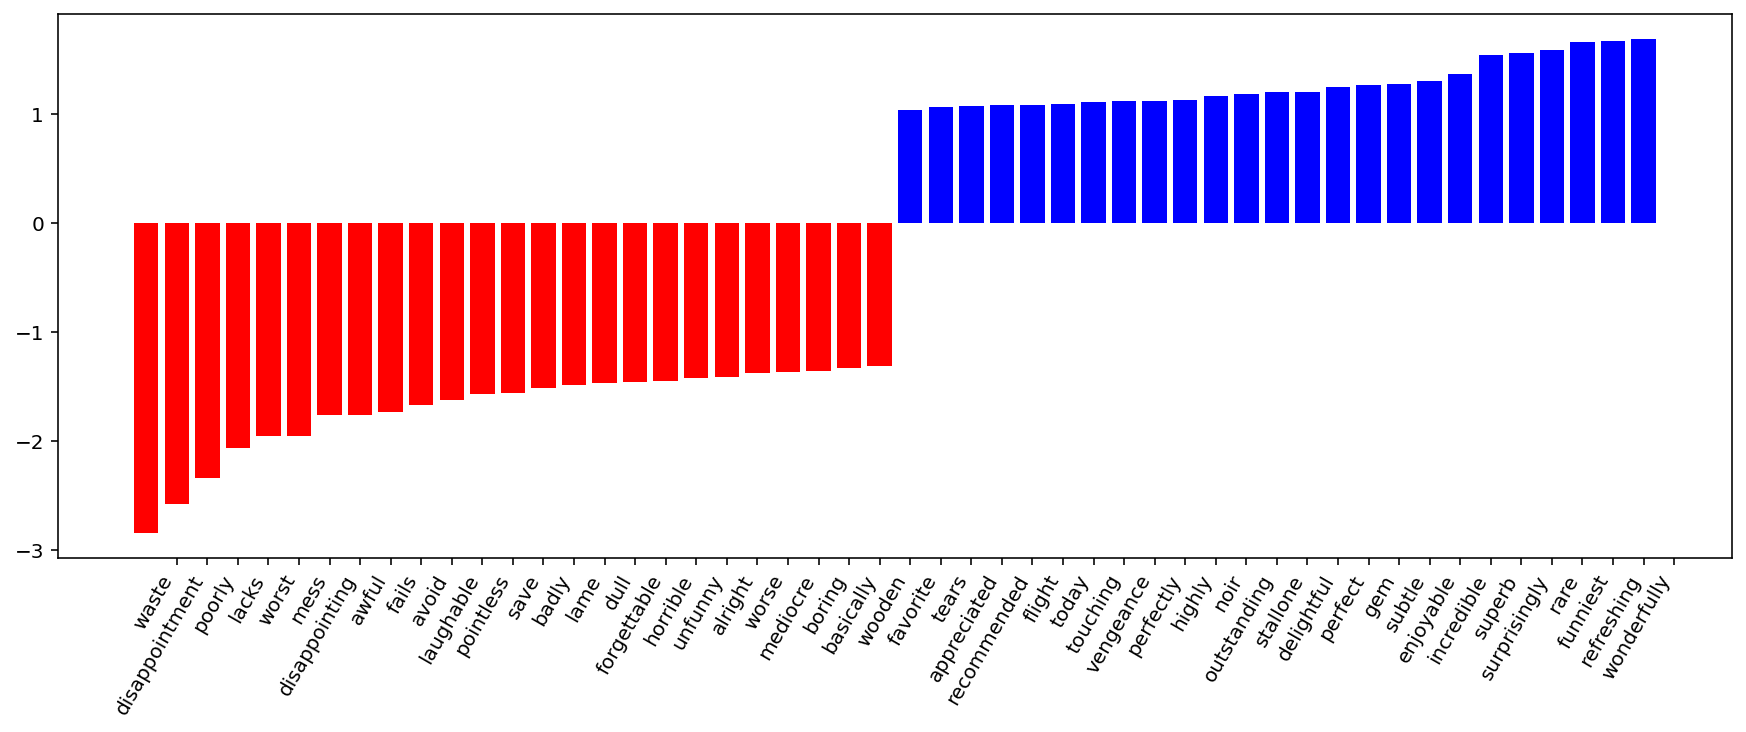

In [66]:
visualize_coefficients(logit, cv.get_feature_names())

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


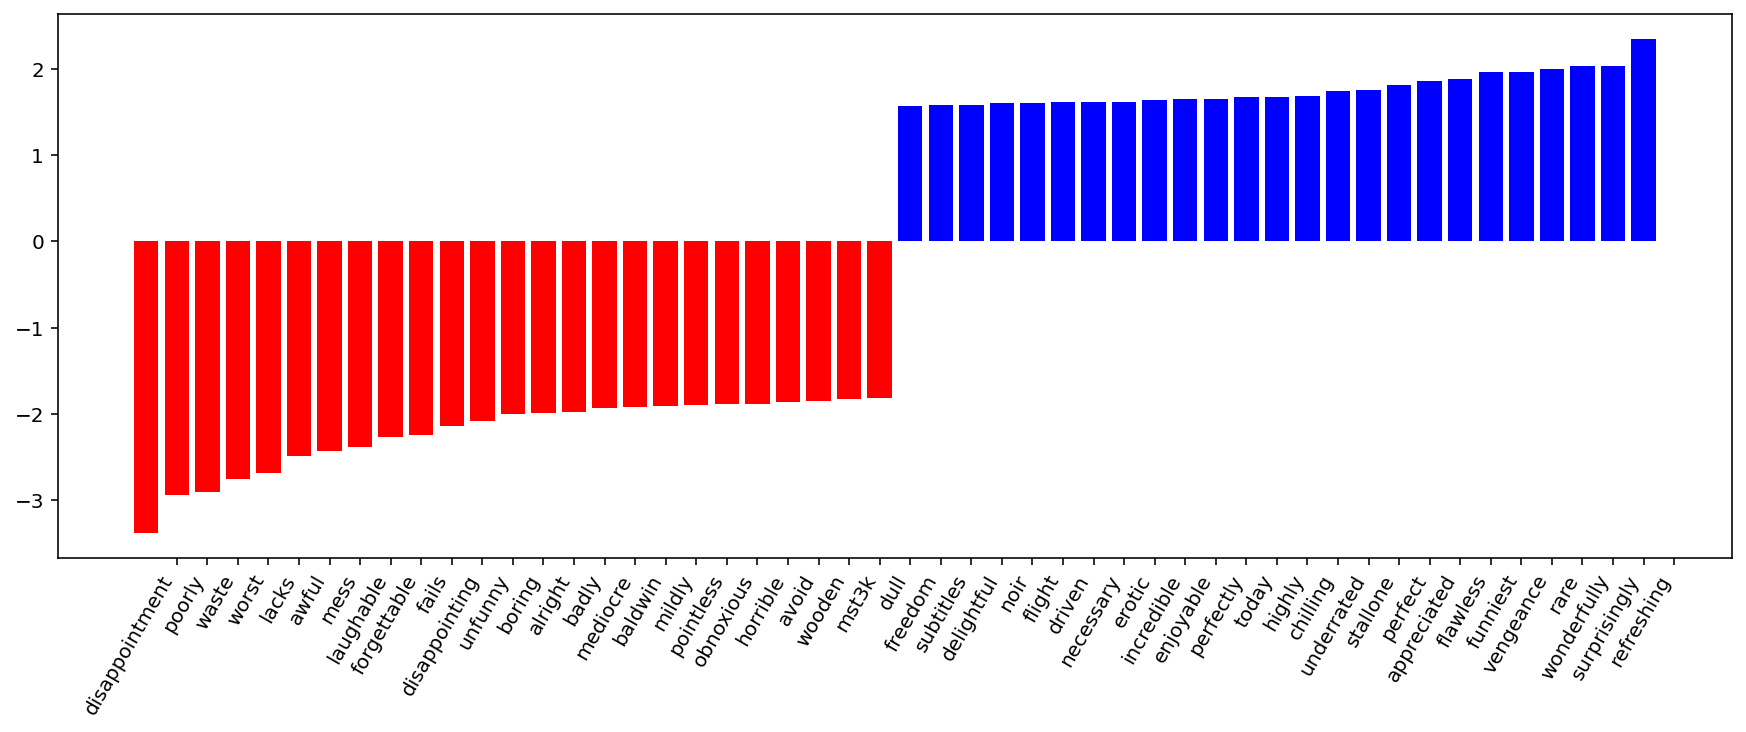

In [67]:
visualize_coefficients(sgd_logit, cv.get_feature_names())

In [82]:
cv = CountVectorizer(ngram_range=(1,2))
X_train_sparse = cv.fit_transform(train_reviews.data)

In [83]:
len(cv.vocabulary_)

1513832

In [84]:
X_test_sparse = cv.transform(test_reviews.data)

In [85]:
X_train_sparse

<25000x1513832 sparse matrix of type '<class 'numpy.int64'>'
	with 8765469 stored elements in Compressed Sparse Row format>

In [86]:
(25000*1513832)

37845800000

In [87]:
%%time
logit.fit(X_train_sparse, y_train)

CPU times: user 470 ms, sys: 218 ms, total: 688 ms
Wall time: 15.4 s


/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [88]:
%%time
sgd_logit.fit(X_train_sparse, y_train)

CPU times: user 1.51 s, sys: 387 ms, total: 1.9 s
Wall time: 730 ms


SGDClassifier(max_iter=40, n_jobs=-1, random_state=17)

In [89]:
accuracy_score(y_test,logit.predict(X_test_sparse))

0.99996

In [90]:
accuracy_score(y_test, sgd_logit.predict(X_test_sparse))

1.0

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


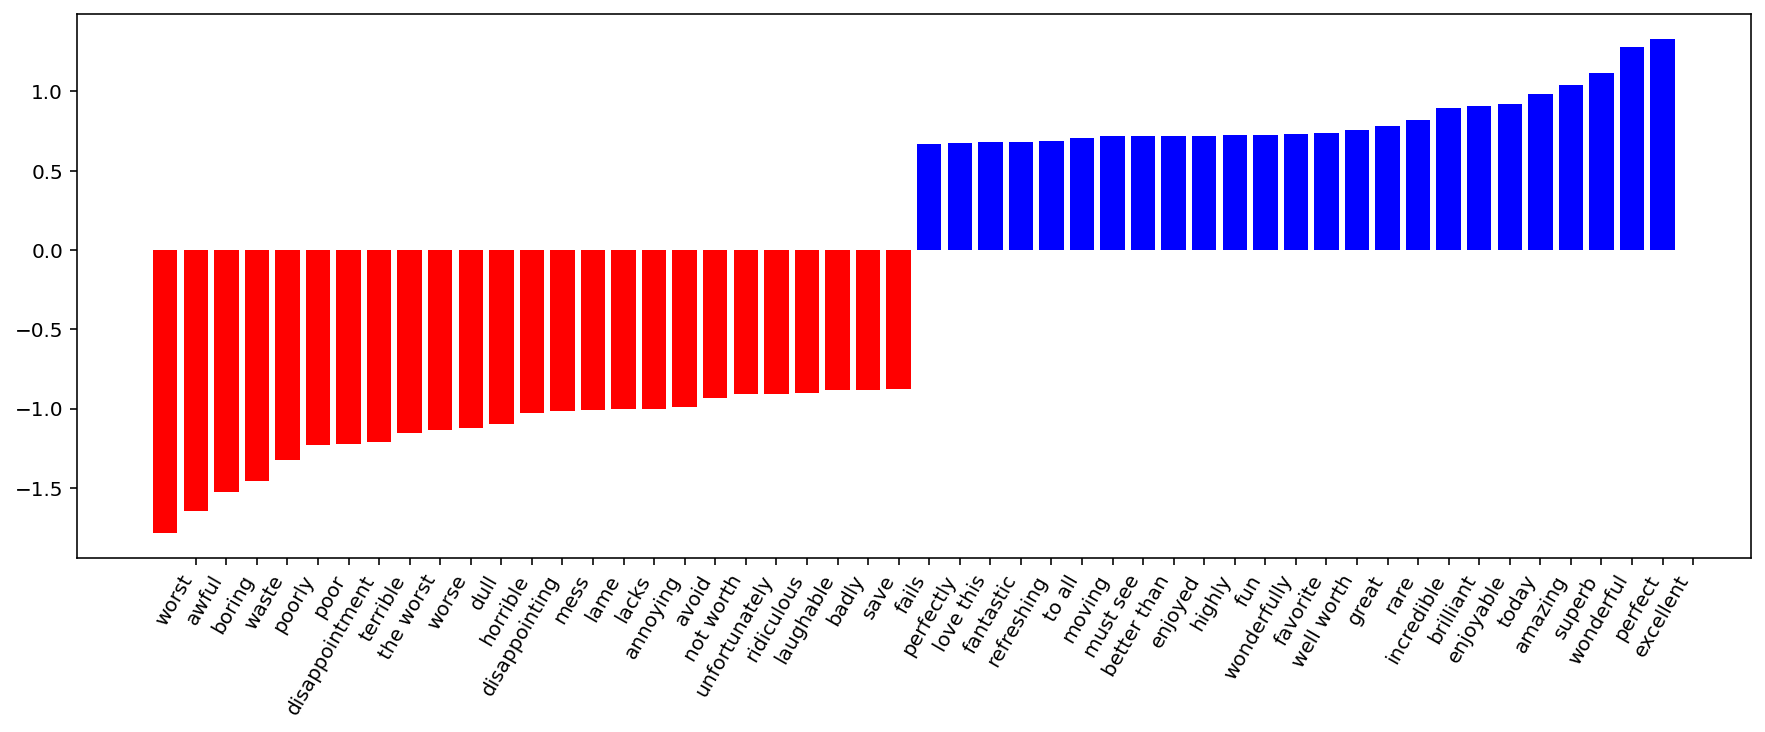

In [80]:
visualize_coefficients(logit, cv.get_feature_names())

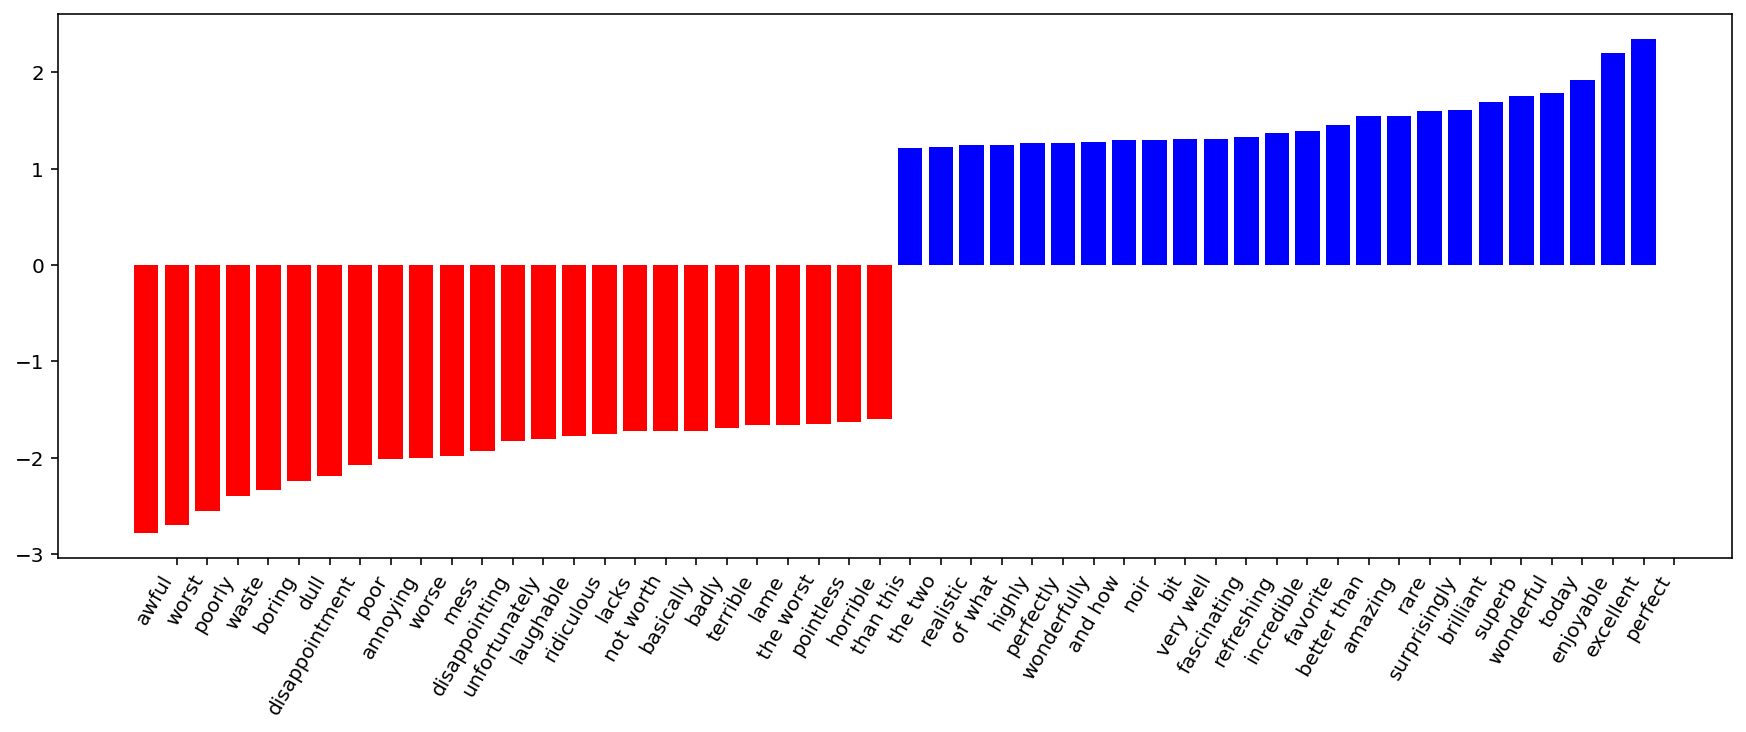

In [81]:
visualize_coefficients(sgd_logit, cv.get_feature_names())

In [93]:
round(logit.score(X_train_sparse, y_train), 3), round(sgd_logit.score(X_train_sparse, y_train), 3)


(1.0, 1.0)

In [115]:
from matplotlib.pyplot import plot
def plot_grid_scores(grid, param_name):
    plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_train_score"],
        color="green",
        label="train",
    )
    plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_test_score"],
        color="red",
        label="test",
    )


In [104]:
%%time
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(
    CountVectorizer(), LogisticRegression(n_jobs=-1, random_state=7)
)

text_pipe_logit.fit(train_reviews.data, y_train)
print(text_pipe_logit.score(test_reviews.data, y_test))

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.98116
CPU times: user 5.98 s, sys: 151 ms, total: 6.13 s
Wall time: 7.98 s


In [111]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {"logisticregression__C": np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1, return_train_score=True)

grid_logit.fit(train_reviews.data, y_train)

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

CPU times: user 3.33 s, sys: 618 ms, total: 3.95 s
Wall time: 32 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=-1,
                                                           random_state=7))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True)

In [106]:
grid_logit.best_params_, grid_logit.best_score_


({'logisticregression__C': 0.1}, 0.8855199324363664)

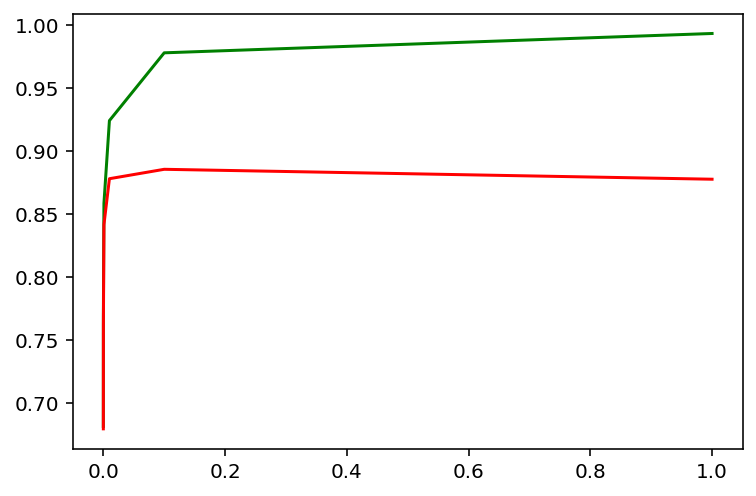

In [116]:
plot_grid_scores(grid_logit, "logisticregression__C")